## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ander\AppData\Local\Temp\ipykernel_11128\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

In [2]:
data = pd.read_csv('Assignment 7/MAL_Project/AnimeList.csv')

data

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14474,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14475,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14476,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


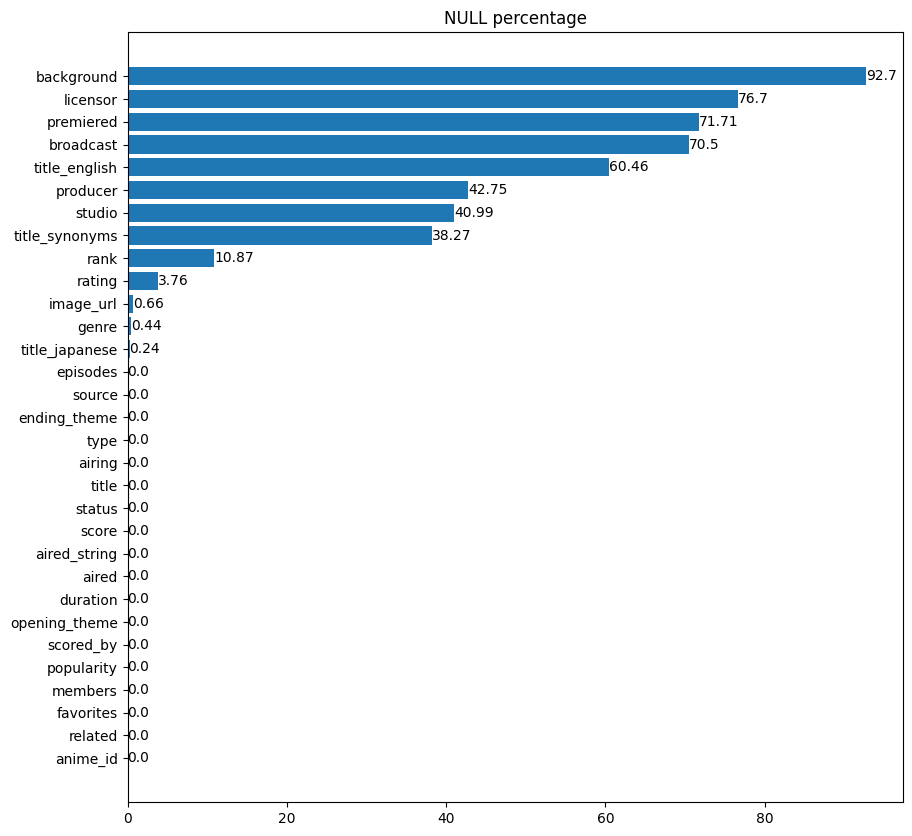

In [3]:
NANp100 = (data.isna().sum() / len(data) * 100).round(2).sort_values()
NANp100DF = pd.DataFrame(NANp100,columns=['percentage'])

plt.figure(figsize = (10,10))
plt.title('NULL percentage')
nullp=plt.barh(NANp100DF.index, NANp100DF.values.flat, align = 'center')
plt.bar_label(nullp, NANp100DF.values.flat)
plt.show()

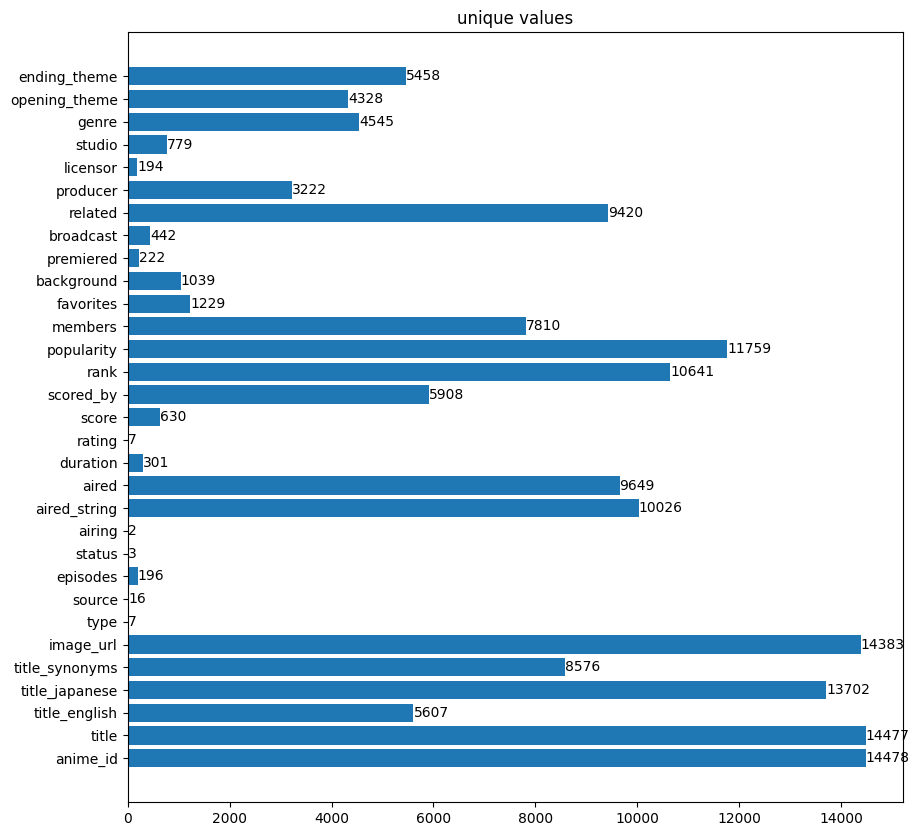

In [4]:
uniqueCount = data.nunique(dropna=False)

plt.figure(figsize = (10,10))
plt.title('unique values')
uCount = plt.barh(uniqueCount.index, uniqueCount.values.flat, align = 'center')
plt.bar_label(uCount, uniqueCount.values.flat)
plt.show()

In [5]:
genreStr = data['genre'].str.cat(sep=', ')
uniqueGenres = pd.Series(genreStr.split(', ')).unique()
pd.DataFrame(uniqueGenres, columns=['genres'])

,genres
0,Comedy
1,Supernatural
2,Romance
3,Shounen
4,Parody
5,School
6,Magic
7,Shoujo
8,Drama
9,Fantasy


In [6]:
producerStr = data['producer'].str.cat(sep=', ')
uniqueProducers = pd.Series(producerStr.split(', ')).unique()
pd.DataFrame(uniqueProducers, columns=['producer'])

,producer
0,Aniplex
1,Square Enix
2,Mainichi Broadcasting System
3,Movic
4,Inu x Boku SS Production Partners
...,...
1108,Shodensha
1109,Yumearu
1110,Gendai Production
1111,Studio Cab


In [7]:
studioStr = data['studio'].str.cat(sep=', ')
uniqueStudios = pd.Series(studioStr.split(', ')).unique()
pd.DataFrame(uniqueStudios, columns=['studio'])

,studio
0,David Production
1,Gonzo
2,Satelight
3,Hal Film Maker
4,J.C.Staff
...,...
504,Yokohama Animation Lab
505,Studio Korumi
506,G-angle
507,TriF Studio


In [8]:
print('Types:')
print(data['type'].unique())
print('Sources:')
print(data['source'].unique())
print('Status:')
print(data['status'].unique())
print('Age rating:')
print(data['rating'].unique())

Types:
['TV' 'Movie' 'Music' 'OVA' 'ONA' 'Special' 'Unknown']
Sources:
['Manga' 'Original' 'Light novel' '4-koma manga' 'Novel' 'Visual novel'
 'Unknown' 'Other' 'Music' 'Game' 'Picture book' 'Card game' 'Web manga'
 'Book' 'Radio' 'Digital manga']
Status:
['Finished Airing' 'Currently Airing' 'Not yet aired']
Age rating:
['PG-13 - Teens 13 or older' 'PG - Children' 'G - All Ages'
 'R+ - Mild Nudity' 'R - 17+ (violence & profanity)' 'Rx - Hentai' nan]


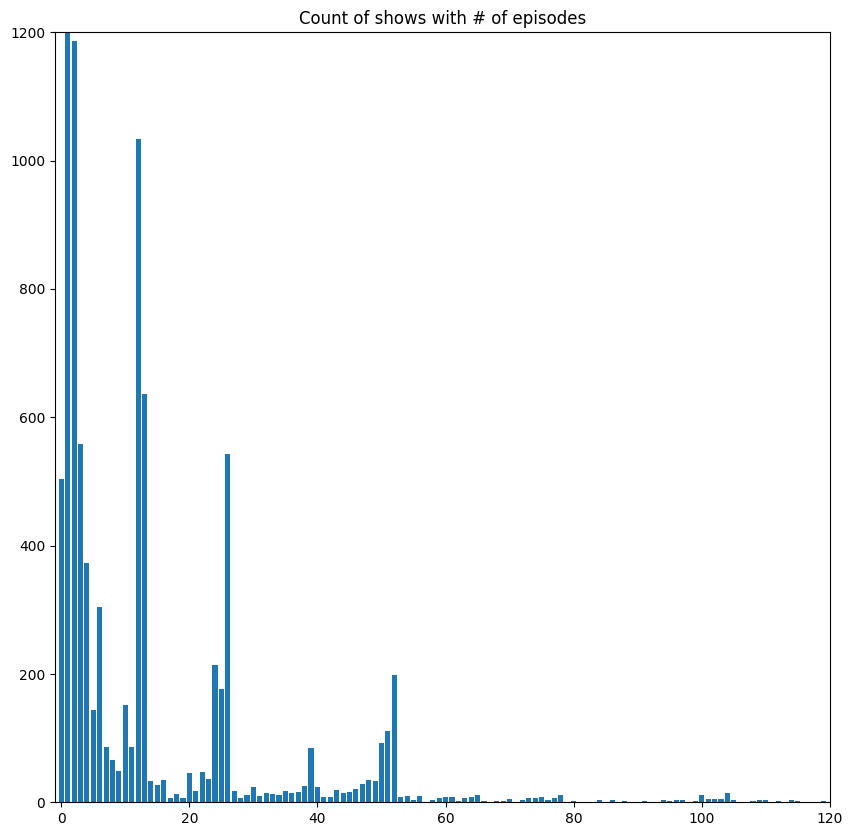

In [9]:
groupedOnEpisodeCount = data[['episodes','anime_id']].groupby(['episodes']).count()

plt.figure(figsize = (10,10))
plt.bar(groupedOnEpisodeCount.index,groupedOnEpisodeCount.values.flat)
plt.title('Count of shows with # of episodes')
plt.gca().set_ylim([0,1200])
plt.gca().set_xlim([-1,120])
plt.show()

In [10]:
groupedOnEpisodeCount.sort_values(['anime_id'], ascending=False)

,anime_id
episodes,
1,6857
2,1187
12,1034
13,637
3,558
...,...
145,1
141,1
137,1


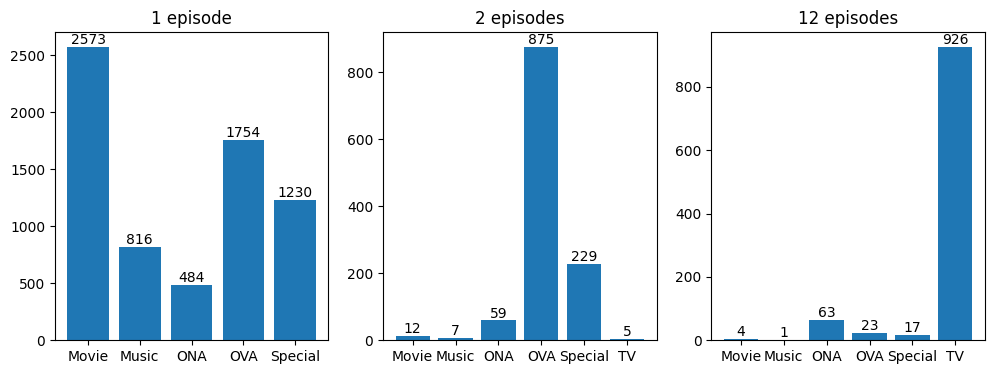

In [11]:
# display('1 Episode:',data.loc[data['episodes'] == 1].groupby('type').count()[['anime_id']],
#         '2 Episode:',data.loc[data['episodes'] == 2].groupby('type').count()[['anime_id']],
#         '12 Episode:',data.loc[data['episodes'] == 12].groupby('type').count()[['anime_id']])

figure,axis = plt.subplots(1,3)

figure.set_figwidth(12)
figure.set_figheight(4)

axis[0].set_title('1 episode')
axis[1].set_title('2 episodes')
axis[2].set_title('12 episodes')

epi1 = axis[0].bar(data.loc[data['episodes'] == 1].groupby('type').count().index,data.loc[data['episodes'] == 1].groupby('type').count()[['anime_id']].values.flat)
axis[0].bar_label(epi1,data.loc[data['episodes'] == 1].groupby('type').count()[['anime_id']].values.flat)
epi2 = axis[1].bar(data.loc[data['episodes'] == 2].groupby('type').count().index,data.loc[data['episodes'] == 2].groupby('type').count()[['anime_id']].values.flat)
axis[1].bar_label(epi2,data.loc[data['episodes'] == 2].groupby('type').count()[['anime_id']].values.flat)
epi12 = axis[2].bar(data.loc[data['episodes'] == 12].groupby('type').count().index,data.loc[data['episodes'] == 12].groupby('type').count()[['anime_id']].values.flat)
axis[2].bar_label(epi12,data.loc[data['episodes'] == 12].groupby('type').count()[['anime_id']].values.flat)
plt.show()

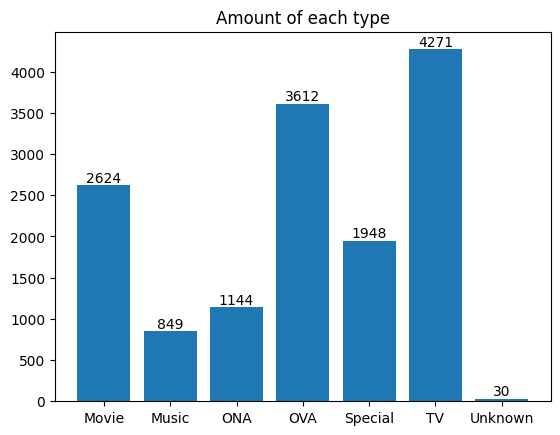

In [12]:
totalTypeCount = plt.bar(data.groupby('type').count().index,data.groupby('type').count()[['anime_id']].values.flat)
plt.bar_label(totalTypeCount,data.groupby('type').count()[['anime_id']].values.flat)
plt.title('Amount of each type')
plt.show()

In [13]:
# data.describe()
display(data[['episodes','score','members','favorites']].describe())

# figure, axis = plt.subplots(3,1)

# figure.set_figwidth(16)
# figure.set_figheight(12)

# axis[0].boxplot(data[['episodes']],vert=False)
# axis[1].boxplot(data[['score']],vert=False)
# axis[2].boxplot(data[['favorites']],vert=False)
# plt.show()

,episodes,score,members,favorites
count,14478.000000,14478.000000,1.447800e+04,14478.000000
mean,11.308399,6.142482,2.296640e+04,311.649606
std,43.443451,1.463981,7.498136e+04,2615.554211
min,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,5.550000,2.450000e+02,0.000000
50%,1.000000,6.370000,1.679500e+03,2.000000
75%,12.000000,7.060000,1.037900e+04,23.000000
max,1818.000000,10.000000,1.456378e+06,106895.000000


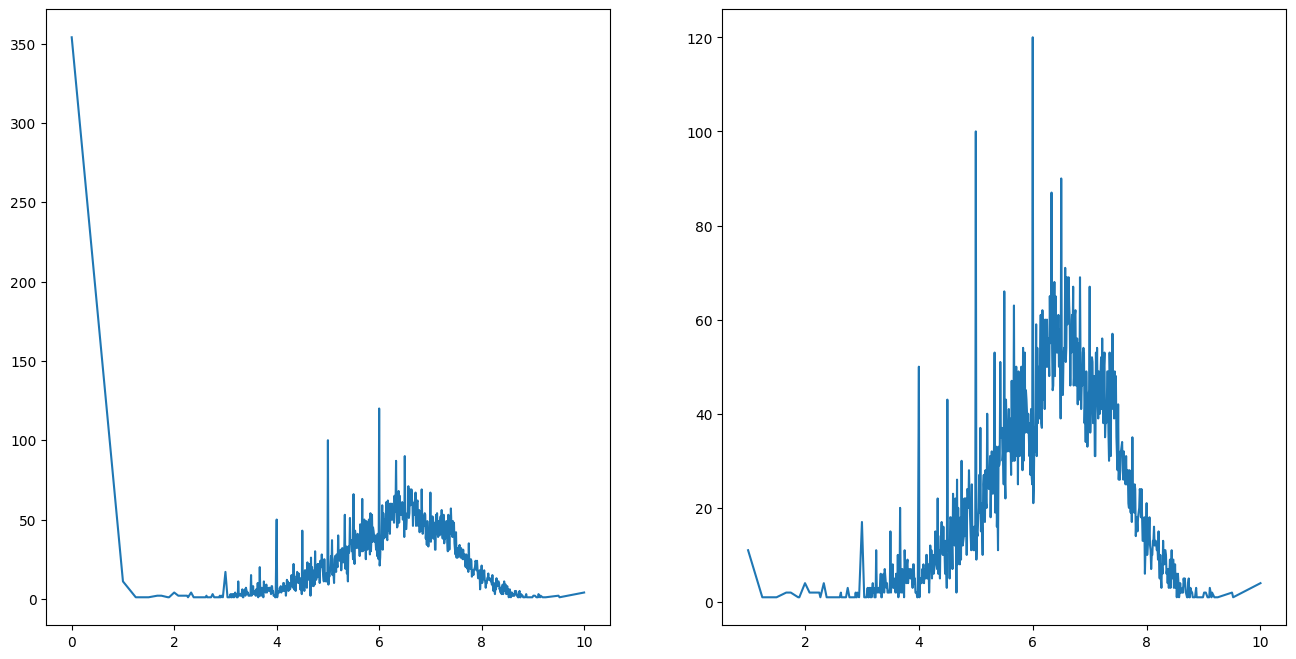

In [14]:
groupedOnScoreCount =data[['score','anime_id']].groupby('score').count()

figure, axis = plt.subplots(1,2)

figure.set_figwidth(16)
figure.set_figheight(8)


axis[0].plot(groupedOnScoreCount.index,groupedOnScoreCount.values.flat)
axis[1].plot(groupedOnScoreCount.drop(0).index,groupedOnScoreCount.drop(0).values.flat)
plt.show()

In [15]:
data.loc[data['score'] == 0].groupby('status').count()[['anime_id']]

,anime_id
status,
Currently Airing,6
Finished Airing,12
Not yet aired,336


,0
0,anime_id
1,episodes
2,airing
3,score
4,scored_by
5,rank
6,popularity
7,members
8,favorites


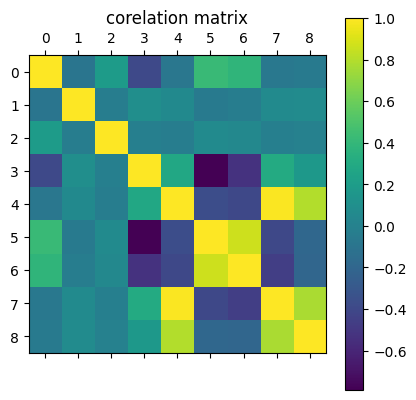

In [16]:
display(pd.DataFrame(data.corr(numeric_only=True).columns))

plt.matshow(data.corr(numeric_only=True))
plt.title('corelation matrix')
plt.colorbar()
plt.show()

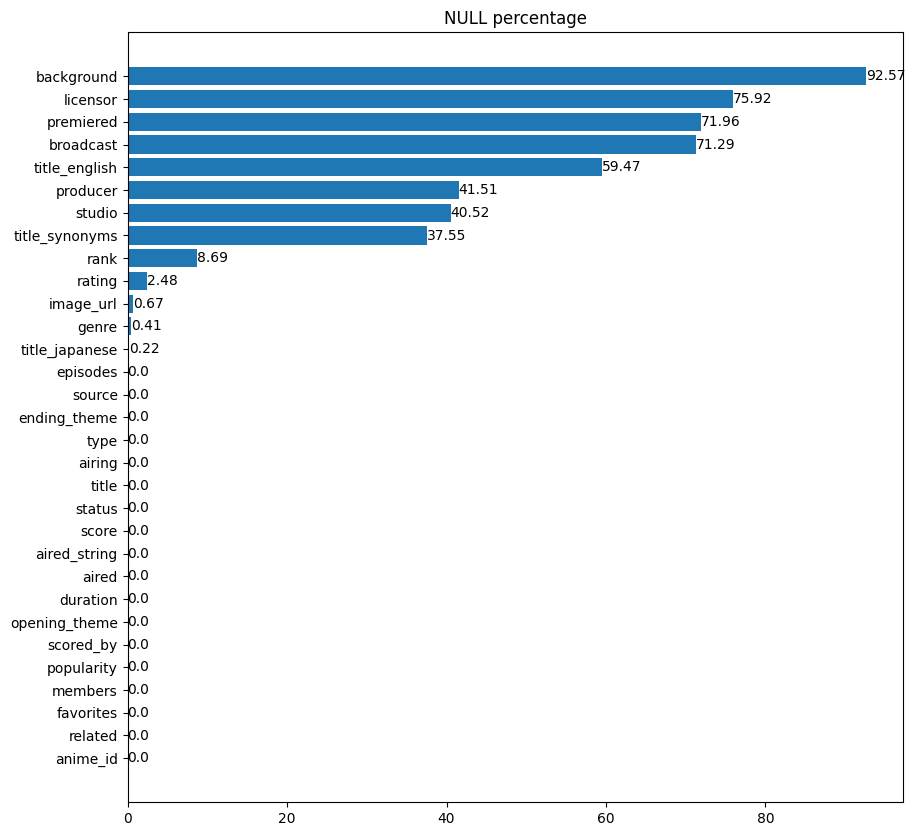

In [17]:
NANp100FinishedAiring = (data.loc[data['status'] == 'Finished Airing'].isna().sum() / len(data.loc[data['status'] == 'Finished Airing']) * 100).round(2).sort_values()
NANp100FinishedAiringDF = pd.DataFrame(NANp100FinishedAiring,columns=['percentage'])

plt.figure(figsize = (10,10))
plt.title('NULL percentage')
nullp=plt.barh(NANp100FinishedAiringDF.index, NANp100FinishedAiringDF.values.flat, align = 'center')
plt.bar_label(nullp, NANp100FinishedAiringDF.values.flat)
plt.show()

In [18]:
import ast
premieredData = data.copy()
display(premieredData.columns)
display(premieredData.dtypes)
display(premieredData[['premiered', 'aired_string', 'aired']])
# display(ast.literal_eval(premieredData['aired'][0])['from'])
# premieredData['aired'][0]
airedFrom = []
for aired in premieredData['aired']:
    airedFrom.append(ast.literal_eval(aired)['from'])
premieredData['airedFrom'] = pd.to_datetime(airedFrom)
display(premieredData[['premiered', 'aired_string', 'aired','airedFrom']])

airedStrCol = []
for airedStr in premieredData['aired_string']:
    if airedStr.split(' to ')[0] == 'Not available':
        airedStrCol.append(pd.to_datetime(None))
        continue
    airedStrCol.append(pd.to_datetime(airedStr.split(' to ')[0]))
premieredData['airedFromStr'] = airedStrCol
display(premieredData[['premiered', 'aired_string', 'airedFromStr', 'aired','airedFrom']])

pd.to_datetime(premieredData['aired_string'][14475].split(' to ')[0])

combinedPremier = []
for item in premieredData[['premiered', 'airedFromStr', 'airedFrom']]:
    

# airedFrom = []
# for aired in premieredData['aired']:
#     airedFrom.append(ast.literal_eval(aired)['from'])
# premieredData['airedFrom'] = pd.to_datetime(airedFrom)

# pd.to_datetime(ast.literal_eval(premieredData['aired'][0])['from'])

SyntaxError: incomplete input (734388072.py, line 34)

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

In [ ]:
# def get_csv_dummies(data):
#     df = pd.DataFrame()
#     for row in data.values:
#         dic = {}
#         if isinstance(row[0],str):
#             for genre in row[0].split(','):
#                 dic[genre] = 1
#         df = pd.concat([df,pd.DataFrame([dic])], ignore_index=True)
#     return df.fillna(0)
def get_csv_dummies(data):
    dic_col = []
    for row in data.values:
        dic = {}
        if isinstance(row[0],str):
            for genre in row[0].split(', '):
                dic[genre] = 1
        dic_col.append(dic)
    df = pd.DataFrame(dic_col)
    return df.fillna(0)


get_csv_dummies(data[['genre']])


,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,...,Psychological,Police,Vampire,Military,Thriller,Yaoi,Cars,Shoujo Ai,Dementia,Yuri
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.